# Outliers deduction and Treatment 

Outlier deduction and treatment are critical steps in Exploratory Data Analysis (EDA) to ensure the data used for analysis or model building is accurate and reliable. Outliers can skew results, affect predictions, and distort patterns in the data. Here's a step-by-step approach to identifying and treating outliers from a data analyst's perspective using real-time data.

Understanding

An outlier is an observation that lies an abnormal distance from other values in a dataset. Outliers can occur due to variability in the data or errors.

Types of Outliers:
 - Univariate outliers: Outliers in one variable.
 - Multivariate outliers: Outliers in multiple variables.
 - Contextual outliers: Values that are only outliers in specific contexts.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load a sample dataset, for example, the Titanic dataset
data = sns.load_dataset('titanic')


In [2]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
#visulaizing

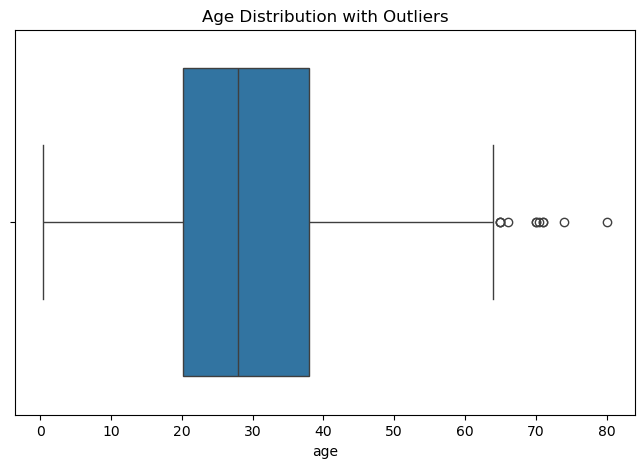

In [4]:
# Plotting a boxplot for age to identify outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['age'])
plt.title("Age Distribution with Outliers")
plt.show()


In [5]:
#detecting outliers

In [6]:
#using IQR (Interquarti

IQR = Q3 - Q1

Outliers are typically defined as values that are below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

In [36]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75) 
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecting outliers
outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]
print(f"Number of outliers in 'age': {len(outliers)}")


Number of outliers in 'age': 4


In [38]:
#handling

In [40]:
#option 1

 Removing Outliers

In [43]:
# Remove outliers
data_clean = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]


In [45]:
#Option 2: Imputing Outliers


Instead of removing, replace outliers with statistical values such as the mean or median.

In [48]:
# Impute outliers with the median
median_age = data['age'].median()
data['age'] = np.where((data['age'] < lower_bound) | (data['age'] > upper_bound), median_age, data['age'])


In [32]:
#Option 3: Capping Outliers

Replace outliers with threshold values (the nearest boundary).


In [53]:
# Cap outliers to the boundary values
data['age'] = np.where(data['age'] < lower_bound, lower_bound, data['age'])
data['age'] = np.where(data['age'] > upper_bound, upper_bound, data['age'])


In [55]:
#Step 6: Rechecking the Data After Treatment


Recheck the data distribution and ensure the outliers have been treated.

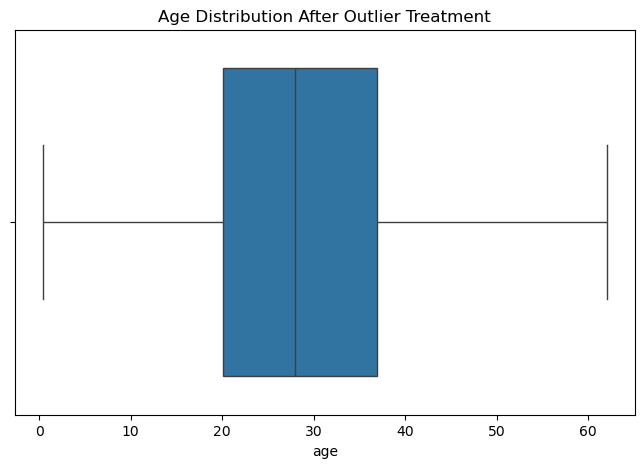

In [58]:
# Plot after treatment
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['age'])
plt.title("Age Distribution After Outlier Treatment")
plt.show()


In [60]:
#Step 7: Documenting and Analyzing Impact


After treatment, document how the removal or imputation of outliers has impacted your data:

Check summary statistics: Compare mean, median, etc., before and after treatment.
Impact on model performance: Outliers can affect regression or classification models.

In [68]:
# Check summary statistics before and after treatment
print("Before treatment:")
print(data['age'].describe())

print("After treatment:")
print(data_clean['age'].describe())


Before treatment:
count    714.000000
mean      28.856681
std       13.374983
min        0.420000
25%       20.125000
50%       28.000000
75%       36.875000
max       62.000000
Name: age, dtype: float64
After treatment:
count    710.000000
mean      28.861507
std       13.412504
min        0.420000
25%       20.000000
50%       28.000000
75%       37.000000
max       62.000000
Name: age, dtype: float64
